# Analyzing Used Car Sales Data to Improve Sales
A quantitative study comprising used car sales data scrapped from all over the United States between April to May of 2021.

### TABLE OF CONTENTS
 - Summary
 - Objective
 - Data Collection
 - Data Cleansing
 - Exploratory Data Analysis
 - Recommendation System
 - Data Modeling (price prediction)
 - Insights
 - Conclusion
 - Challenges and Future Work
 
### SUMMARY
The market for used cars has seen growth over the years. During the pandemic, about 61% of car buyers prefered to buy from a dealership. 

Over time, the recorded data has shown that the total auto sale of second-hand vehicles has increased two-fold when compared to new car sales in the US

With the number available used vehicles out there, buyers are faced with an abundance of options to choose from.
This analysis seeks to understand the historical preferences of buyers and how that can be leveraged to improve the craigslist algorithm to assist buyers and seller alike.

### OBJECTIVE
 - To improve used car sales listed on craigslist by creating a recommender system to show buyers similar listings to the one they currently view 
 - To create a price prediction model to assist buyers and sellers on a ballpark price to expect for specific models and features

### DATA COLLECTION
The used car data was scraped and compiled into one place by a data contributor, Austin Reese, on kaggle website. The data contains all relevant information that craigslist provides on car sales in the United States such as vehicle price, condition, manufacturer, location, and 16 other categories.


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
df = pd.read_csv('vehicles.csv')
# View the dataset
df.head()

id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
1          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
2          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
3          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
4          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   

  image_url description county state lat long posting_date  
0       NaN         NaN    NaN    az NaN  NaN          NaN  
1       NaN         NaN    NaN    ar NaN  NaN          NaN  
2       NaN         NaN    NaN    fl NaN  NaN          NaN  
3       NaN         NaN    NaN    ma NaN  NaN          NaN  
4       NaN         NaN    NaN    nc NaN  NaN          NaN  

[5 rows x 26 columns]

### DATA CLEANSING


In [4]:
# View data info and shape
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

(426880, 26)

#### Remove duplicates

In [7]:
#check if there are any 'True' boolean statements in the duplicate function
df.duplicated().value_counts()

False    426880
dtype: int64

There are no duplicate entries in the data. This could also be missleading as the id column could have different numbers but other details are identical. Let's have a look.

First, keep the coulmns needed for analysis. 
Delete columns: 
 - **region_url and image_url** -- website links to posting, region, and car image resp.. Not important. Although, image_url will be used to get the image of hte car for recommendation purposes
 - **VIN** -- identification of the car. Not important
 - **description** -- not important in this analysis. No word count analysis involved in this project
 - **county** -- dummy column left in dataset

Also remove the id column to check for duplicates


In [2]:
#Select required columns
output = df[['region', 'price', 'year', 'manufacturer', 'model', 
             'fuel', 'odometer', 'title_status', 'transmission', 
             'condition', 'cylinders', 'drive', 'size', 'type', 
             'paint_color', 'state','image_url', 'lat', 'long', 'posting_date']]
output.to_csv('vehicles2.csv',index=False)

In [3]:
df = pd.read_csv('vehicles2.csv')
df.head()

region  price  year manufacturer model fuel  odometer  \
0                prescott   6000   NaN          NaN   NaN  NaN       NaN   
1            fayetteville  11900   NaN          NaN   NaN  NaN       NaN   
2            florida keys  21000   NaN          NaN   NaN  NaN       NaN   
3  worcester / central MA   1500   NaN          NaN   NaN  NaN       NaN   
4              greensboro   4900   NaN          NaN   NaN  NaN       NaN   

  title_status transmission condition cylinders drive size type paint_color  \
0          NaN          NaN       NaN       NaN   NaN  NaN  NaN         NaN   
1          NaN          NaN       NaN       NaN   NaN  NaN  NaN         NaN   
2          NaN          NaN       NaN       NaN   NaN  NaN  NaN         NaN   
3          NaN          NaN       NaN       NaN   NaN  NaN  NaN         NaN   
4          NaN          NaN       NaN       NaN   NaN  NaN  NaN         NaN   

  state image_url  lat  long posting_date  
0    az       NaN  NaN   NaN          NaN  
1    ar       NaN  NaN   NaN          NaN  
2    fl       NaN  NaN   NaN          NaN  
3    ma       NaN  NaN   NaN          NaN  
4    nc       NaN  NaN   NaN          NaN

In [4]:
df.duplicated().value_counts()

False    426845
True         35
dtype: int64

There seem to be 35 duplicate rows to be removed.

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(426845, 20)

#### Select variables and remove missing values

Let's examine the posting dates against the geographical positions to filter hotspots.

In [9]:
#view posting date format
df.posting_date

0                              NaN
1                              NaN
2                              NaN
3                              NaN
4                              NaN
                    ...           
426875    2021-04-04T03:21:31-0600
426876    2021-04-04T03:21:29-0600
426877    2021-04-04T03:21:17-0600
426878    2021-04-04T03:21:11-0600
426879    2021-04-04T03:21:07-0600
Name: posting_date, Length: 426845, dtype: object

In [10]:
# change posting date to datetime format and get the day and month
df=df.dropna(subset=['posting_date'],axis=0)
df['postmd'] = pd.to_datetime(df['posting_date'],utc=True).apply(lambda x: x.strftime('%B-%d')
                                                            if not pd.isnull(x) else '')
df['postmd']

27          May-04
28          May-04
29          May-04
30          May-04
31          May-03
            ...   
426875    April-04
426876    April-04
426877    April-04
426878    April-04
426879    April-04
Name: postmd, Length: 426788, dtype: object

In [11]:
df.sort_values(by='postmd')
df.shape

(426788, 21)

#### Examine and remove missing data

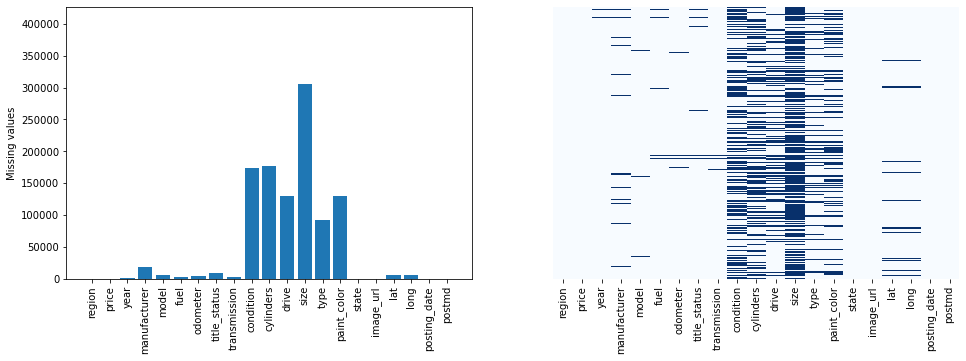

In [13]:
#Let's visualize the missing data
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
#first plot, bar plot of missing values
ax1.bar(df.columns,df.isna().sum())
ax1.set_ylabel('Missing values')
ax1.set_ylim(0,df.shape[0])
ax1.tick_params('x',labelrotation=90)
#second plot, heatmap of missing values
sns.heatmap(df.isna(),yticklabels=False,cbar=False, cmap='Blues',ax=ax2)
plt.show()

Visualizing the missing data, we see that there are quite a number of columns with a lot of missing data. Namely: **size**, **condition**, **cylinders**, **drive**, **paint_color**, and **type**.
Since more than 50% of values in the **size** columns is missing, it will be removed.

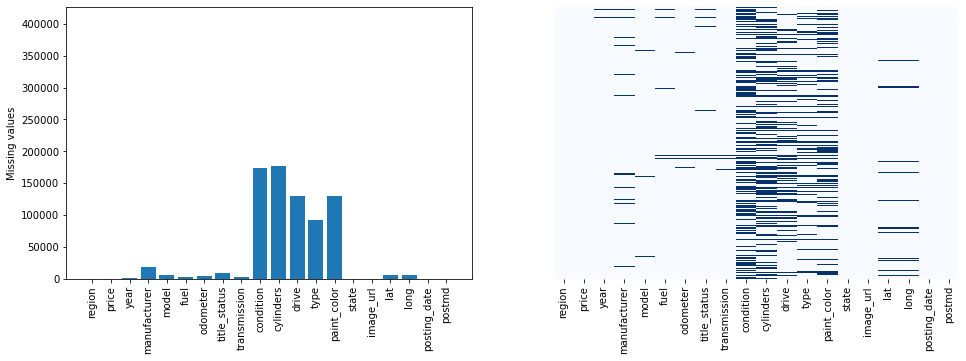

In [14]:
#Remove size column and replot
df.drop(['size'],axis=1,inplace=True)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
#first plot, bar plot of missing values
ax1.bar(df.columns,df.isna().sum())
ax1.set_ylabel('Missing values')
ax1.set_ylim(0,df.shape[0])
ax1.tick_params('x',labelrotation=90)
#second plot, heatmap of missing values
sns.heatmap(df.isna(),yticklabels=False,cbar=False, cmap='Blues',ax=ax2)
plt.show()

_Missing values removal 1_: Remove rows with missing values present in **year, model, fuel, odometer** and **transmission** as these are important information that cannot be easily obtained. 

_Missing values removal 2_: Then, remove rows with concurrent missing values present in all of the remaining columns **(manufacturer, condition, cylinders, title_status, drive, type, paint_color, lat and long)** with missing values

_Missing values removal 3_: Keep rows with at least 7 non-NA values.

In [17]:
#drop missing rows in year, model, fuel, odometer, transmission
df.dropna(subset=['year','model','fuel','odometer','transmission'],axis=0,inplace=True)
df.shape

(412348, 20)

In [18]:
#drop all concurrent missing values in manufacturer, condition, cylinders, title status, drive, type, paint color, lat and long 
df.dropna(subset=['manufacturer', 'condition', 'cylinders', 'title_status', 
                    'drive', 'type', 'paint_color', 'lat', 'long'], axis=0, how='all', inplace=True)
df.shape

(412348, 20)

It seems there are no rows with concurrent missing values in those columns.

In [19]:
#keep rows with at least 7 non-NA values
df.dropna(subset=['manufacturer', 'condition', 'cylinders', 'title_status', 
                    'drive', 'type', 'paint_color', 'lat', 'long'], axis=0, thresh=7, inplace=True)
df.shape

(302565, 20)

With this dataset, a maximum of 2 missing values are concurently present in a row.

#### Remove outliers

Search for outliers in the columns with numerical values, namely: **price** and **odometer**

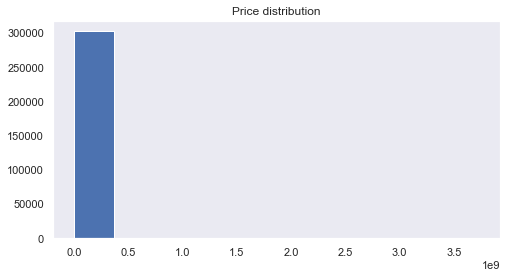

In [62]:
#check the price column for outliers
fig,ax=plt.subplots(figsize=(8,4))
df.price.hist()
plt.title('Price distribution')
plt.grid(False)

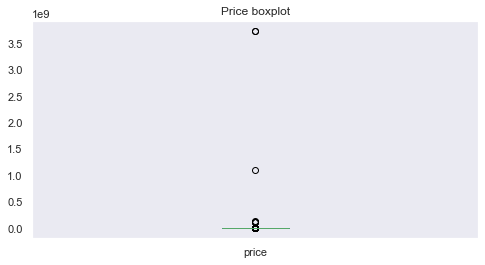

In [63]:
#use boxplots to find outliers
fig,ax=plt.subplots(figsize=(8,4))
df.price.plot(kind='box')
plt.title('Price boxplot')
plt.grid(False)

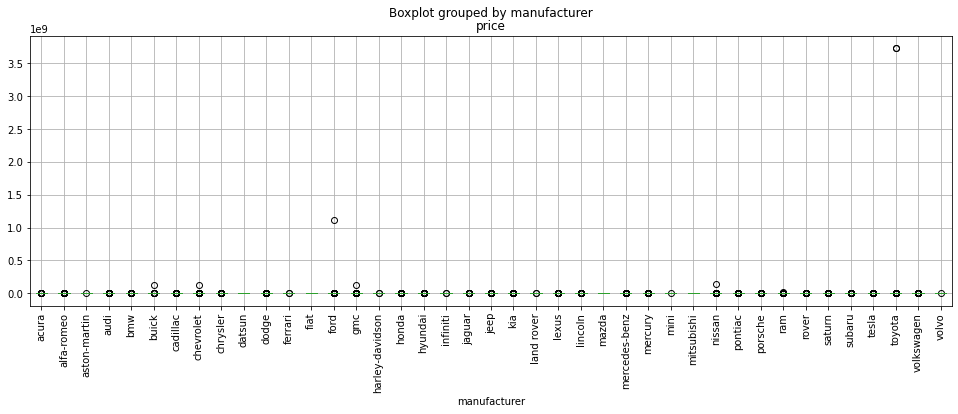

In [28]:
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','manufacturer',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

#high price strangely related to ford and toyota. Might be erorr in data enrty or scraping because these manufacturers are 
#not known for high end luxury or sporting cars

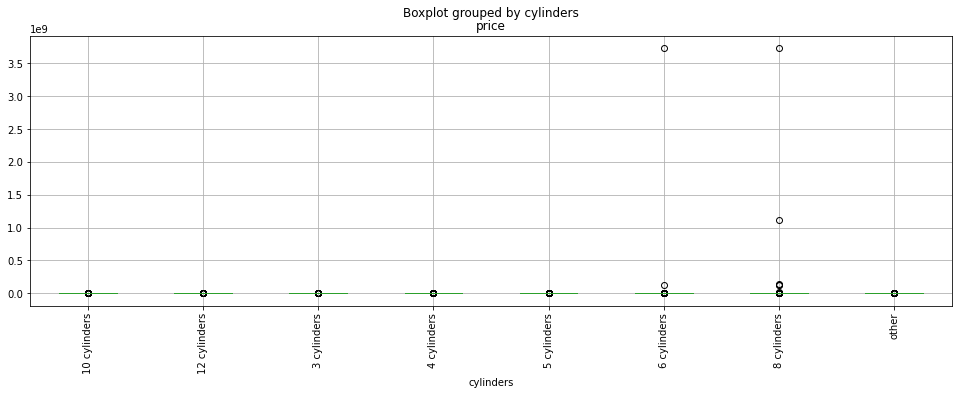

In [27]:
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','cylinders',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()
#high price related to 6 and 8 cylinder cars which indicate large pickups or sporting cars

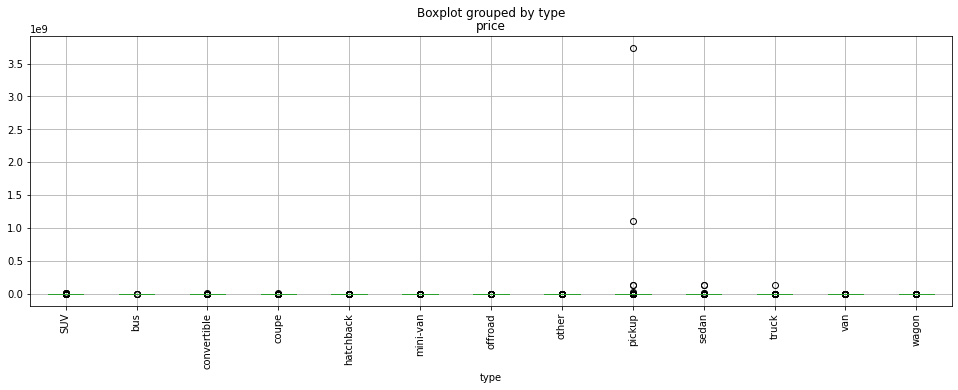

In [26]:
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','type',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()
#high price strangely related to pickup trucks

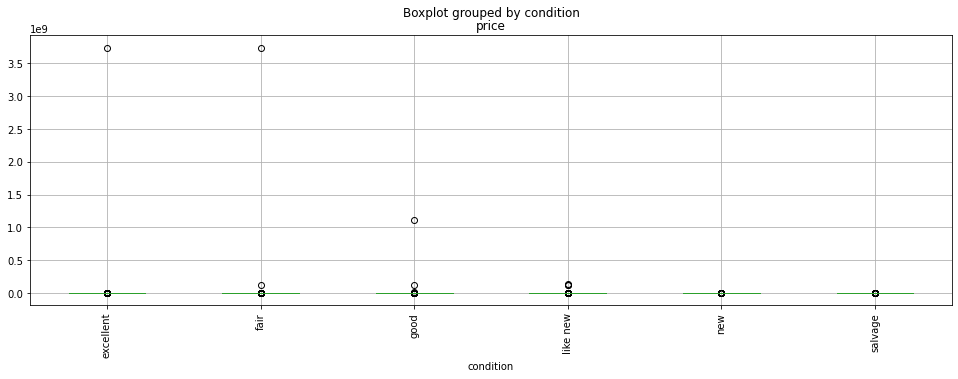

In [52]:
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','condition',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()
# high price not related to new cars

In [30]:
#view the high priced car outliers
#for prices upwards of 100,000,000, ford, toyota, chevrolet, nissan and buick are present.
outlier=df.loc[((df.price > 500_000) & (df.price < 100_000_000))]
outlier

id                   region     price    year   manufacturer  \
68935   7302895209           ventura county   2000000  2002.0         saturn   
95119   7311936036    ft myers / SW florida    990000  2017.0  mercedes-benz   
105843  7314124996                  orlando   6995495  2014.0          dodge   
106361  7313051670                  orlando    516999  2016.0            NaN   
136516  7316047597  spokane / coeur d'alene  17000000  2007.0            ram   
155421  7308748768              terre haute   1234567  2006.0           jeep   
194292  7307876060                ann arbor   1234567  2010.0        lincoln   
208617  7315966576  saginaw-midland-baycity    554900  2019.0            NaN   
219241  7305419038             southwest MS   1111111  1970.0          dodge   
327938  7314563134        altoona-johnstown   3226714  2002.0            NaN   

                              model  condition     cylinders    fuel  \
68935       l-series l200 4dr sedan       good   4 cylinders     gas   
95119                      amg g 63        NaN   8 cylinders     gas   
105843                      journey        NaN   4 cylinders     gas   
106361  Lambo Aventador SV Roadster   like new  12 cylinders     gas   
136516                         2500       good   8 cylinders  diesel   
155421                     wrangler   like new   6 cylinders     gas   
194292                 mkt ecoboost   like new           NaN     gas   
208617             f250 xlt crewcab  excellent   8 cylinders     gas   
219241                   challenger       fair   8 cylinders     gas   
327938                  any and all       fair   8 cylinders  diesel   

        odometer title_status transmission drive         type paint_color  \
68935   164290.0        clean    automatic   fwd        sedan       green   
95119     4085.0        clean    automatic   4wd          SUV       white   
105843  135888.0        clean    automatic   fwd          SUV         NaN   
106361    9982.0        clean    automatic   4wd  convertible       white   
136516  170000.0      rebuilt    automatic   4wd       pickup       black   
155421  123456.0        clean    automatic   4wd          SUV      custom   
194292   85653.0        clean    automatic   NaN          SUV      custom   
208617   25365.0         lien    automatic   4wd       pickup       white   
219241   42000.0        clean    automatic   rwd        coupe        blue   
327938    1234.0        clean       manual   4wd        sedan        blue   

       state        lat        long              posting_date    postmd  
68935     ca  34.236498 -119.039074  2021-04-06T16:40:31-0700  April-06  
95119     fl  26.157900  -81.766548  2021-04-24T13:12:08-0400  April-24  
105843    fl  28.394900  -81.417900  2021-04-28T20:11:41-0400  April-29  
106361    fl  28.463700  -81.394800  2021-04-26T17:40:47-0400  April-26  
136516    id  47.642227 -117.348404  2021-05-02T19:27:17-0700    May-03  
155421    in  38.025845  -87.596457  2021-04-18T11:26:55-0400  April-18  
194292    mi  41.381500  -83.650700  2021-04-16T15:15:44-0400  April-16  
208617    mi  43.637500  -84.197900  2021-05-02T18:30:41-0400    May-02  
219241    ms  47.509800 -111.273400  2021-04-11T19:04:00-0500  April-12  
327938    pa  40.480100  -78.726300  2021-04-29T18:24:17-0400  April-29

There seem to be errors in the price values. It seems random and intentionally set to various price extremes.

There also seem to be an issue with some of the pricing for the cars. For example, the 2002 saturn Lseries has an average resale value of 5,000 USD but here it shows 2,000,000 USD. Either there is entry error or error from data scraping.

Also, some of the odometer readins seem unreasonable. For example, the odometer reading for a 2017 mercedez benz amg G63 (item 95119) is only 4,085 km. So it would be wise to use a reasonable start and limit for the odometer reading for this analysis

In [51]:
#more tests on the price column
test=df.loc[((data.manufacturer == "tesla"))]
test.head()

id                region  price    year manufacturer  \
1008  7309692127            birmingham  29890  2013.0        tesla   
1333  7306565136            birmingham  32990  2013.0        tesla   
1806  7301654156            birmingham  29890  2013.0        tesla   
2901  7313488107  huntsville / decatur  32990  2013.0        tesla   
3263  7309692165  huntsville / decatur  29890  2013.0        tesla   

                  model condition cylinders      fuel  odometer title_status  \
1008            model s       NaN       NaN  electric   61591.0        clean   
1333            model s       NaN       NaN  electric   69961.0        clean   
1806            model s       NaN       NaN  electric   61591.0        clean   
2901  model s signature      good       NaN  electric   62588.0        clean   
3263            model s       NaN       NaN  electric   61591.0        clean   

     transmission drive   type paint_color state        lat       long  \
1008    automatic   rwd  sedan        grey    al  33.669601 -86.817617   
1333    automatic   rwd  sedan       white    al  33.669601 -86.817617   
1806    automatic   rwd  sedan        grey    al  33.669601 -86.817617   
2901        other   rwd  sedan       white    al  34.570000 -86.980000   
3263    automatic   rwd  sedan        grey    al  33.669601 -86.817617   

                  posting_date    postmd  
1008  2021-04-20T04:50:54-0500  April-20  
1333  2021-04-14T04:50:50-0500  April-14  
1806  2021-04-04T10:01:09-0500  April-04  
2901  2021-04-27T14:31:19-0500  April-27  
3263  2021-04-20T04:51:06-0500  April-20

There are no used tesla cars being sold for less than 30,000 USD in good condition

We shall therefore set a reasonable price range of between **1,000 USD** and **200,000 USD.**

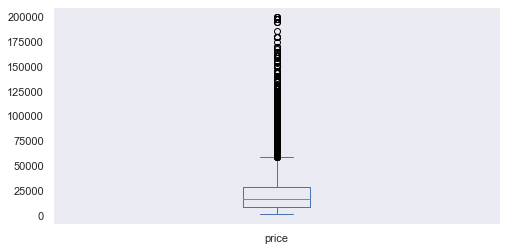

In [20]:
#filter data for price between 1k and 150k
df2 = df.loc[(df.price >= 1_000) & (df.price <= 200_000)]
sns.set()
fig,(ax1)=plt.subplots(figsize=(8,4))
df2.price.plot(kind='box')
ax2.set_title('1,000 - 200,000 price range')
plt.grid(False)

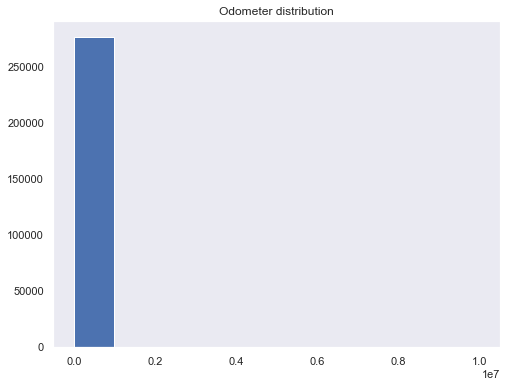

In [31]:
#check the odometer column for outliers
fig,ax=plt.subplots(figsize=(8,6))
df2.odometer.hist()
plt.title('Odometer distribution')
plt.grid(False)

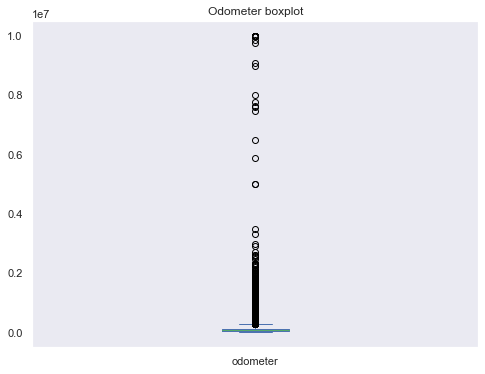

In [32]:
#use boxplots to find outliers
fig,ax=plt.subplots(figsize=(8,6))
df2.odometer.plot(kind='box')
plt.title('Odometer boxplot')
plt.grid(False)

There seem to be a lot of outliers and abnormalities in the odometer readings. To address this, we consider that the average mileage per year in the US is 14,000 miles (22,500 km). And assuming the minimum age of a car is 2, In the spirit of the analysis purpose, we assume the minimum age of a listed car is 2 yrs, so we shall filter the odometer readings between **45,000 km** and **500,000 km** (28,000 to 300,000 miles) driven.

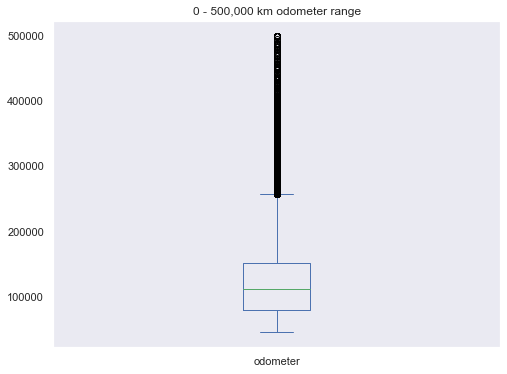

In [21]:
#filter data for odometer between 0 miles and 500,000 km
df3 = df2.loc[(df2.odometer >= 45_000) & (df2.odometer <= 500_000)]
fig,(ax)=plt.subplots(figsize=(8,6))
df3.odometer.plot(kind='box')
ax.set_title('0 - 500,000 km odometer range')
plt.grid(None)

In [22]:
df3.shape

(191279, 20)

In [1]:
#save new dataset and load
#df3.to_csv('vehicles2_cleaned.csv',index=False)
import pandas as pd
data = pd.read_csv('vehicles2_cleaned.csv')
data.head()


region  price    year manufacturer                        model fuel  \
0  auburn  33590  2014.0          gmc     sierra 1500 crew cab slt  gas   
1  auburn  22590  2010.0    chevrolet               silverado 1500  gas   
2  auburn  15000  2013.0         ford                    f-150 xlt  gas   
3  auburn  27990  2012.0          gmc  sierra 2500 hd extended cab  gas   
4  auburn   4500  1992.0         jeep                     cherokee  gas   

   odometer title_status transmission  condition    cylinders drive    type  \
0   57923.0        clean        other       good  8 cylinders   NaN  pickup   
1   71229.0        clean        other       good  8 cylinders   NaN  pickup   
2  128000.0        clean    automatic  excellent  6 cylinders   rwd   truck   
3   68696.0        clean        other       good  8 cylinders   4wd  pickup   
4  192000.0        clean    automatic  excellent  6 cylinders   4wd     NaN   

  paint_color state                                          image_url  \
0       white    al  https://images.craigslist.org/00R0R_lwWjXSEWNa...   
1        blue    al  https://images.craigslist.org/00R0R_lwWjXSEWNa...   
2       black    al  https://images.craigslist.org/00404_l4loxHvdQe...   
3       black    al  https://images.craigslist.org/00V0V_ftJbKrOgdi...   
4         NaN    al  https://images.craigslist.org/01010_7EM2aot64G...   

       lat     long              posting_date  postmd  
0  32.5900 -85.4800  2021-05-04T12:31:18-0500  May-04  
1  32.5900 -85.4800  2021-05-04T12:31:08-0500  May-04  
2  32.5920 -85.5189  2021-05-03T14:02:03-0500  May-03  
3  32.5900 -85.4800  2021-05-03T13:41:25-0500  May-03  
4  32.6454 -85.3783  2021-05-03T07:38:05-0500  May-03

In [ ]:
data.isna().sum()

### EXPLORATORY DATA ANALYSIS

We take a look at some of the variables and their distribution.

##### The posting date column

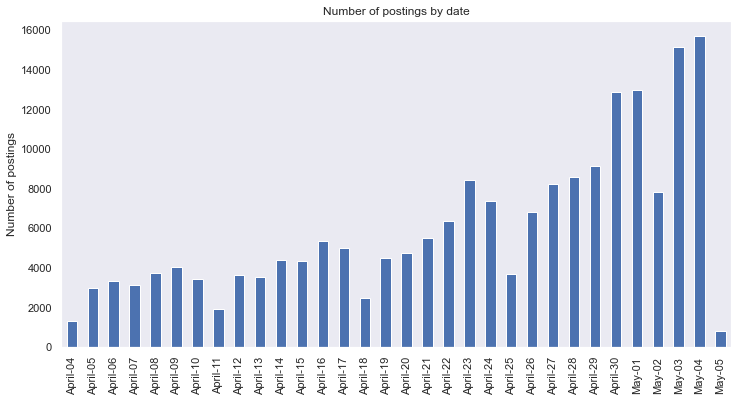

In [24]:
# Check number of listings for each day of data entry
fig,ax=plt.subplots(figsize=(12,6))
sns.set()
data.postmd.value_counts().sort_index().plot(kind='bar')
plt.ylabel('Number of postings')
plt.title('Number of postings by date')
plt.grid(None)

It looks like the number of postings increased by about 15,000 in a month (4th April to 4th May)

##### The state column

In [3]:
#code for presenting the geographical distribution of the used car listings
import plotly.graph_objects as go
import plotly.express as px

mapcount = data.groupby('state', dropna=False)['state'].count().reset_index(name="count")
fig = go.Figure(data = go.Choropleth(
    locations=mapcount['state'].str.upper(),
    z=mapcount['count'],
    locationmode='USA-states',
    colorscale='YlOrBr',
    colorbar_title="Total",
    hovertext=data['state'],
), layout=dict(title = 'Total Vehicles by States'))

fig.update_layout(
    geo_scope = 'usa'
)

fig.show()

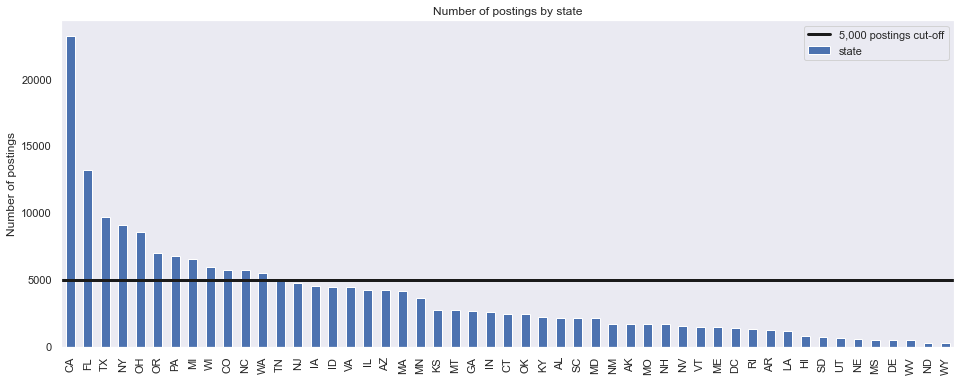

In [66]:
# Check number of postings per state
fig,ax=plt.subplots(figsize=(16,6))
data.state.str.upper().value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of postings')
plt.title('Number of postings by state')
y=[5000,5000]
x=[-1,100]
_=plt.plot(x,y,color='k',label='5,000 postings cut-off',linewidth=3)
_=plt.legend()
plt.grid(None)


There are a number of states with much smaller amounts of used car postings compared to the heavy used car availability states. Therefore, in the spirit of increasing used car sales, locations with at least **5,000** used car postings during the April-May period will be focused. The aim is to target high used cars availability states.

In [75]:
# get the states with <5000 used car postings
data['state'].apply(lambda x: x.upper()).value_counts()>=5000
#data.state.value_counts().index

CA     True
FL     True
TX     True
NY     True
OH     True
OR     True
PA     True
MI     True
WI     True
CO     True
NC     True
WA     True
TN    False
NJ    False
IA    False
ID    False
VA    False
IL    False
AZ    False
MA    False
MN    False
KS    False
MT    False
GA    False
IN    False
CT    False
OK    False
KY    False
AL    False
SC    False
MD    False
NM    False
AK    False
MO    False
NH    False
NV    False
VT    False
ME    False
DC    False
RI    False
AR    False
LA    False
HI    False
SD    False
UT    False
NE    False
MS    False
DE    False
WV    False
ND    False
WY    False
Name: state, dtype: bool

In [25]:
# Filter out the states with <5000 used car postings
datav2 = data.loc[~(data.state.isin(['tn', 'nj', 'ia', 'id', 'va', 'il', 'az', 'ma', 'mn', 'ks', 'mt', 'ga',
       'in', 'ct', 'ok', 'ky', 'al', 'sc', 'md', 'nm', 'ak', 'mo', 'nh', 'nv',
       'vt', 'me', 'dc', 'ri', 'ar', 'la', 'hi', 'sd', 'ut', 'ne', 'ms', 'de',
       'wv', 'nd', 'wy']))]
datav2.shape

(106753, 20)

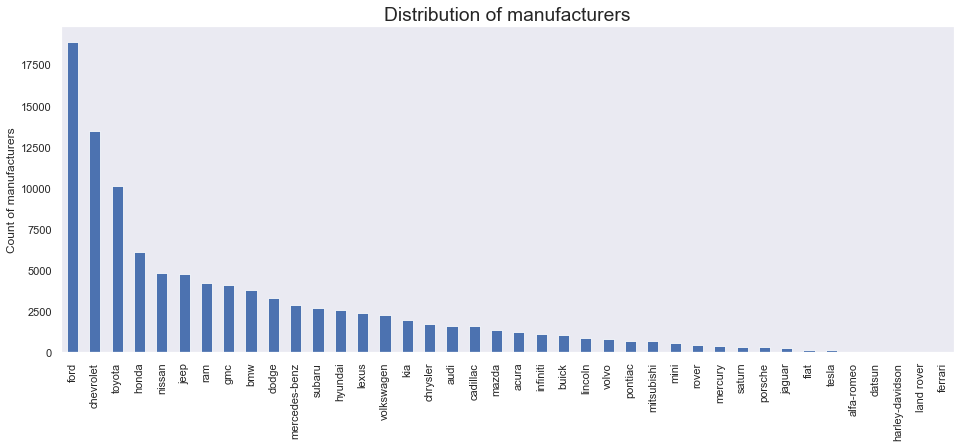

In [26]:
#check the distribution of manufacturers 
fig,ax=plt.subplots(figsize=(16,6))
sns.set_context('paper',font_scale=2)
datav2.manufacturer.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count of manufacturers')
plt.title('Distribution of manufacturers')
plt.grid(False)
#y=[2500,2500]
#x=[-1,100]
#_=plt.plot(x,y,color='k',label='5,000 postings cut-off',linewidth=3)
#_=plt.legend()

The top 3 most popularl listed used car manufacturers are **ford, chevrolet,** and **toyota** while the least 3 are **land rover,  aston martin**, and **datsun**.

##### The condition variable

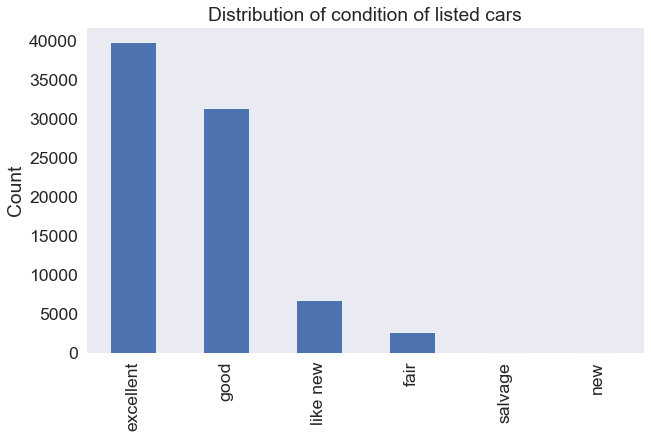

In [78]:
#check the condition of the listed used cars 
fig,ax=plt.subplots(figsize=(10,6))
datav2.condition.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count')
plt.title('Distribution of condition of listed cars')
plt.grid(None)

Most of the listed cars are in either **good** or **excellent** condition. This increases the marketability of the listed cars to buyers.

##### The cylinders column

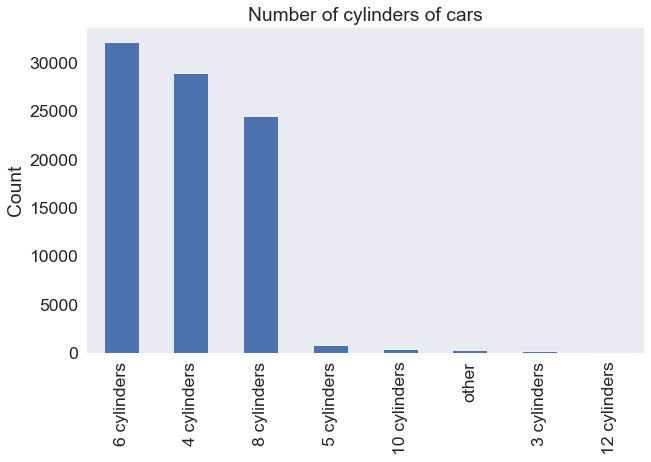

In [80]:
#check the number of cylinders of the listed used cars 
fig,ax=plt.subplots(figsize=(10,6))
datav2.cylinders.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count')
plt.title('Number of cylinders of cars')
plt.grid(None)

Cars with **4, 6,** and **8** cylinders are the most popular listed posting on craigslist. This is expected because most cars are equipped with cylinders in that range.

##### The fuel column

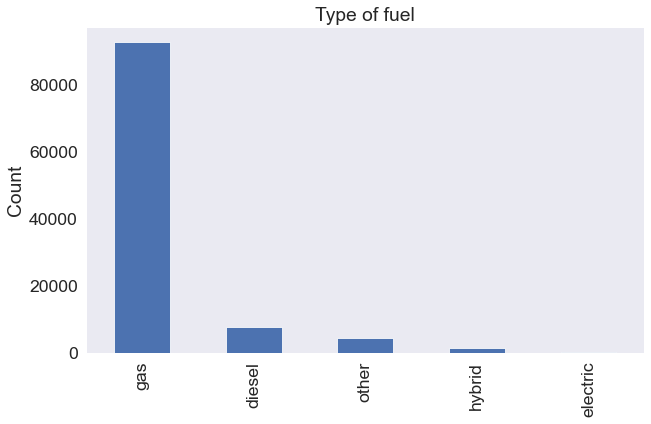

In [82]:
#check the fuel type used for listed used cars 
fig,ax=plt.subplots(figsize=(10,6))
datav2.fuel.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count')
plt.title('Type of fuel')
plt.grid(None)

As expected, **gas (petrol)** is the most common type of fuel for the listed cars.

###### The odometer column

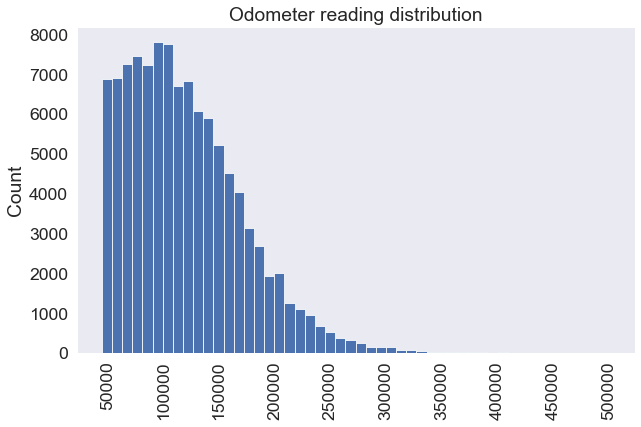

In [85]:
#check the odometer range for the listed cars 
fig,ax=plt.subplots(figsize=(10,6))
datav2.odometer.hist(bins=50)
plt.ylabel('Count')
plt.xticks(rotation=90)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(10000))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(50000))

plt.title('Odometer reading distribution')
plt.grid(None)

The bulk of the used cars odometer reading is clustered around **45,000 - 175,000 km**

##### The title status column

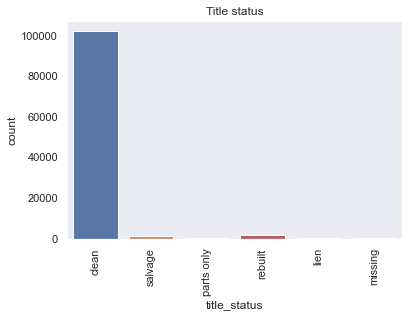

In [90]:
#check the title stutus column
sns.countplot(x='title_status',data=datav2)
plt.title('Title status')
plt.xticks(rotation=90)
plt.grid([])

**Clean** is the most occuring title status for the used car listings.

##### The transmission column

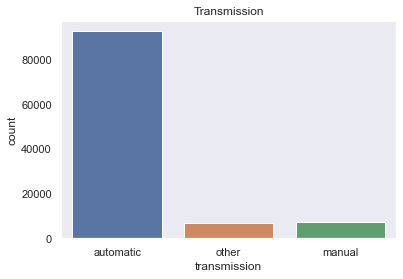

In [91]:
#check the transmission column
sns.countplot(x='transmission',data=datav2)
plt.title('Transmission')
plt.grid([])

The most common car transmission type is automatic as expected.

##### The drive column

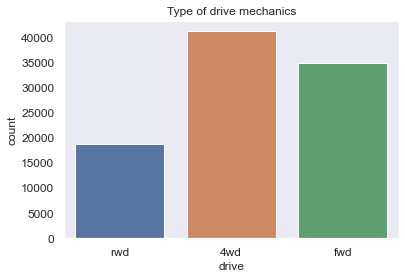

In [92]:
#check the drive column
sns.countplot(x='drive',data=datav2)
plt.title('Type of drive mechanics')
plt.tick_params(labelsize=12)
plt.grid([])

There are more fwd and 4wd vehicles than rwd. Front-wheel drives are standarad for many cars, crossovers, and SUVs while 4wd's, designed for severe off-road conditions, are common in most trucks and large SUVs. Rear-wheel drives are are also common in trucks and SUVs.

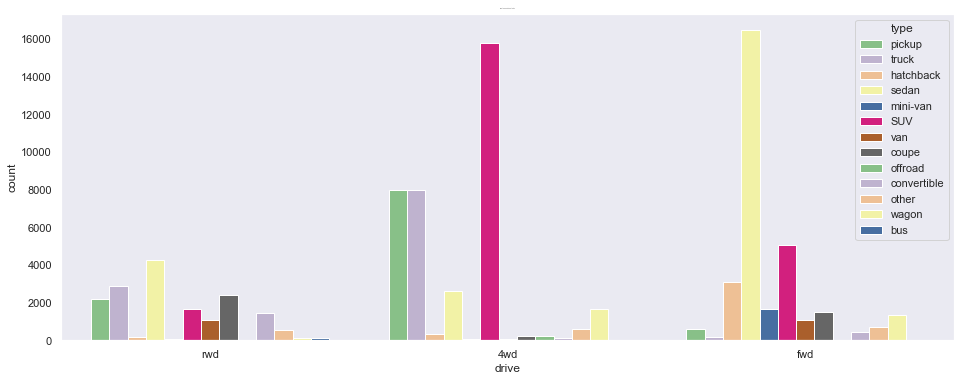

In [93]:
#check drive type and car type distribution
plt.figure(figsize=(16,6))
sns.countplot(x='drive',data=datav2,hue='type',palette='Accent')
sns.set_context('paper',font_scale=0)
plt.title('Drive type and car type distribution')
plt.grid([])



##### The car type column

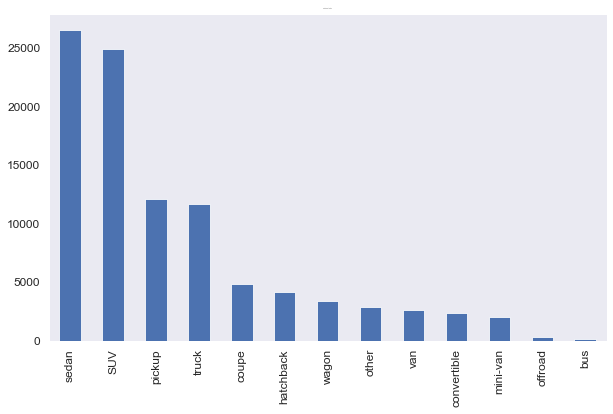

In [94]:
#check the car type distribution
plt.figure(figsize=(10,6))
datav2.type.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Car type distribution')
plt.tick_params(labelsize=12)
plt.grid([])

Sedans, SUVs are the two most popular car listings followed by pickups and trucks.

##### The car color column

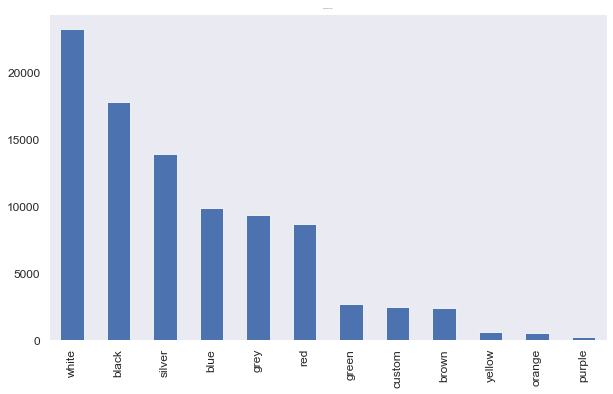

In [96]:
#check the car color distribution
plt.figure(figsize=(10,6))
datav2.paint_color.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Car colors distribution')
plt.tick_params(labelsize=12)
plt.grid([])

White and black are the two most popular colors of cars being listed, followed closely by silver. 

Blue, red, and grey are the 3 next popular car colors.

In [27]:
#save data to new file
datav2.to_csv('vehicles2_EDA.csv', index=False)
data = pd.read_csv('vehicles2_EDA.csv')

Let's take a look at the distribution of the year of the listed used cars.

In [28]:
#convert the year column from 'float64' to year type as 'int64'
data['year']=pd.to_datetime(data['year'],errors='ignore',format='%y')

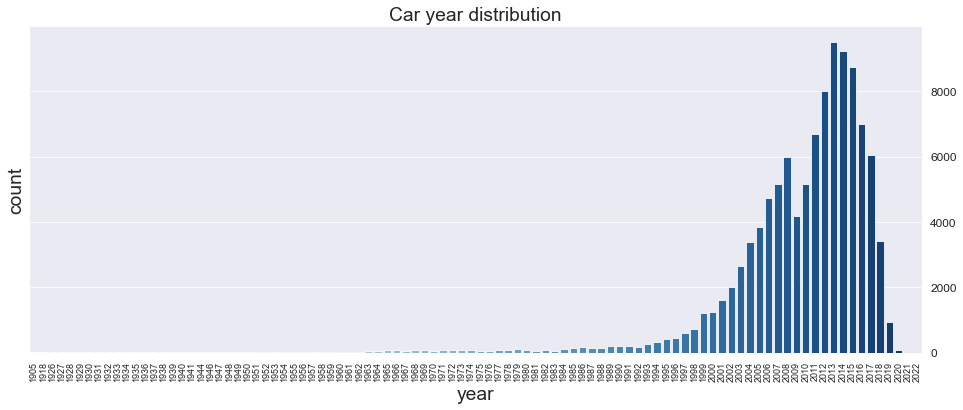

In [29]:
#check the car year distribution
plt.figure(figsize=(16,6))
sns.countplot(x='year',data=data,palette='Blues',dodge=False)
plt.title('Car year distribution')
plt.tick_params(labelsize=12)
plt.xticks(fontsize=9,rotation=90)
plt.tick_params(axis='y', labelleft=False, labelright=True)
plt.show()

The majority of the used cars model year come from between 2011 - 2020. It seems sellers tend to sell their cars within 10 years of ownership.


Distinguish older cars from newer ones. Create two new columns: **age** of cars by year, and **average mileage** of car per year

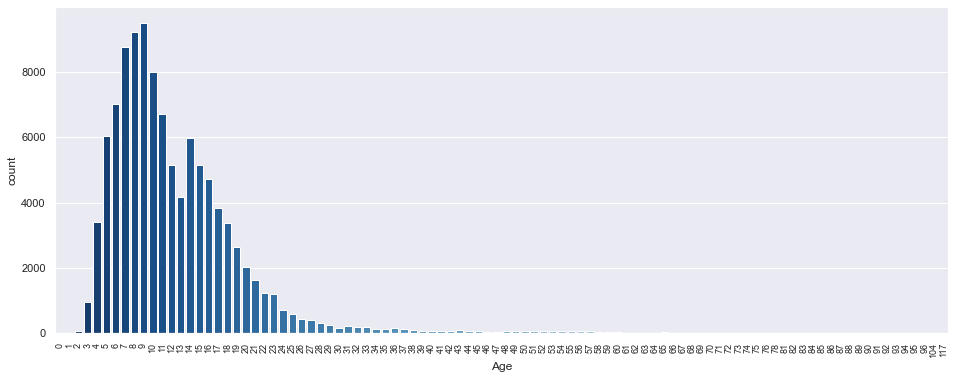

In [30]:
#create Age column
data['Age'] = 2021 - (data['year']-1)
#plot Age distribution
plt.figure(figsize=(16,6))
sns.set()
sns.countplot(x='Age',data=data,palette='Blues_r')
plt.xticks(fontsize=9,rotation=90)
plt.show()

The sentiment around the age at which a car is considered old ranges from 10 to 20 years. When it comes to the prime age of a used car people will buy, the sentiment is based on the condition, history, and sometimes model of the car. Nevertheless, the prime age is around **2-3 years old**. For this analysis, cars older than 15 years will be considered old.

The most common listed cars are **4-5 years old**

In [31]:
#take out the 0-1 year old cars
data = data.loc[~(data.Age < 2)]

In [32]:
#create average mileage per year column
data['avg_mil'] = data['odometer'] / data['Age']
data['avg_mil']

0         10894.736842
1         10659.842105
2          8613.000000
3         11687.500000
4          1220.000000
              ...     
106748     9067.300000
106749     9820.000000
106750     2828.125000
106751    13521.000000
106752    12071.142857
Name: avg_mil, Length: 106749, dtype: float64

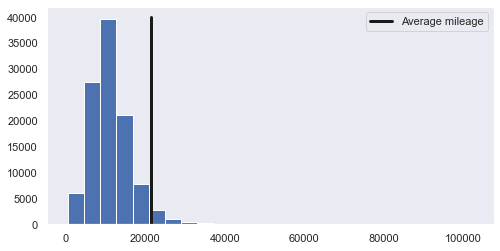

In [33]:
#create a plot of the average mileages
plt.figure(figsize=(8,4))
data.avg_mil.hist(bins=25)
y=[0,40000]
x=[21500,21500]
_=plt.plot(x,y,color='k',label='Average mileage',linewidth=3)
_=plt.legend()
plt.grid(None)

Create a column to classify whether each car's average mileage per year is below or above the average of **13,500 miles** (21,500 km) in the US

In [34]:
#create milage rating column
data['mil_rating'] = "below average"
data.loc[data['avg_mil'] > 21500, 'mil_rating'] = "above average"

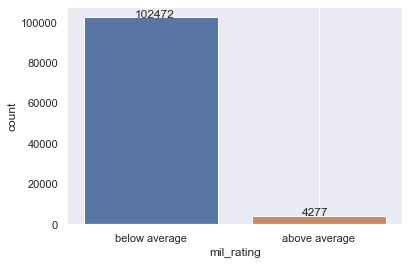

In [35]:
#plot the chart of mileage rating
ax = sns.countplot(x='mil_rating',data=data)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.01))
plt.grid()
plt.show()

Most of the cars have a yearly mileage below the average of 21,500 km per year.

There are still a sizable amount of missing values in the dataset. Before removing the missing rows, rename the categorical variable to custom numbers and see what is going on with the variables. This conversion will also be used for model creation purposes.

In [36]:
#save data to new file
data.to_csv('vehicles2_cleaned_v2.csv',index=False)
data = pd.read_csv('vehicles2_cleaned_v2.csv')

##### More Data cleaning for model building
Another look at the missing data so it can be properly cleaned to be used in models for price prediction and the simple recommender system.

In [37]:
data.isna().sum()

region              0
price               0
year                0
manufacturer     2911
model               0
fuel                0
odometer            0
title_status     1021
transmission        0
condition       25824
cylinders       19551
drive           11720
type             9021
paint_color     15199
state               0
image_url           0
lat               149
long              149
posting_date        0
postmd              0
Age                 0
avg_mil             0
mil_rating          0
dtype: int64

Since it would be cumbersome to fish out the manufacturer from the model for all the missing values, and random manufacturers wouldn't suffice, the rows with missing manufacturers will be taken out.

In [38]:
#drop missing values in manufacturer column
data.dropna(subset=['manufacturer'],axis=0,inplace=True)

Classify manufacturers by their countries

In [39]:
#print unique manufacturer entries
data.manufacturer.unique()

array(['harley-davidson', 'chevrolet', 'mini', 'pontiac', 'volkswagen',
       'lexus', 'nissan', 'toyota', 'ram', 'acura', 'ford', 'kia',
       'honda', 'fiat', 'mercedes-benz', 'gmc', 'infiniti', 'bmw',
       'hyundai', 'tesla', 'jeep', 'subaru', 'mitsubishi', 'dodge',
       'audi', 'cadillac', 'chrysler', 'datsun', 'volvo', 'mazda',
       'porsche', 'lincoln', 'buick', 'rover', 'jaguar', 'mercury',
       'alfa-romeo', 'saturn', 'land rover', 'ferrari'], dtype=object)

In [40]:
#create manufacturer countries, 'Made', column
data_copy = data.copy()
def country(row):
  if row['manufacturer'] in ['harley-davidson', 'chevrolet', 'pontiac', 'ram', 'ford', 'gmc', 'tesla', 'jeep', 'dodge',
                             'cadillac', 'chrysler', 'lincoln', 'buick', 'saturn', 'mercury']:
    val = 'American'
  elif (row['manufacturer'] in ['lexus', 'nissan', 'toyota', 'acura', 'honda', 'infiniti', 'subaru', 'mitsubishi', 
                                'datsun', 'mazda']):
    val = 'Japanese'
  elif (row['manufacturer'] in ['volkswagen', 'mercedes-benz', 'bmw', 'audi', 'porsche']):
    val = 'German'
  elif (row['manufacturer'] in ['ferrari','fiat','alfa-romeo']):
    val = 'Italian'
  elif (row['manufacturer'] in ['kia','hyundai']):
    val = 'Korean'
  elif (row['manufacturer'] in ['volvo']):
    val = 'Swedish'
  elif (row['manufacturer'] in ['rover','mini','land rover', 'jaguar']):
    val = 'English'
  return val
data_copy['Made'] = data_copy.apply(country, axis=1)
data_copy.head()          

region  price  year     manufacturer                    model    fuel  \
0  bakersfield  11975  2003  harley-davidson                 davidson     gas   
1  bakersfield  21950  2003        chevrolet           silverado 3500  diesel   
2  bakersfield  15590  2015             mini  hardtop 2 door cooper s   other   
3  bakersfield   3975  2006          pontiac                       g6     gas   
4  bakersfield   8000  1972        chevrolet                 chevelle     gas   

   odometer title_status transmission  condition  ... state  \
0  207000.0        clean    automatic  excellent  ...    ca   
1  202537.0        clean    automatic  excellent  ...    ca   
2   60291.0        clean        other       good  ...    ca   
3  187000.0        clean    automatic  excellent  ...    ca   
4   61000.0        clean    automatic       fair  ...    ca   

                                           image_url        lat        long  \
0  https://images.craigslist.org/00F0F_eEBhgvA15M...  34.070612 -117.383384   
1  https://images.craigslist.org/00m0m_9owDGrPLWK...  33.794656 -117.992994   
2  https://images.craigslist.org/00f0f_dGlIKGTKrJ...  35.380000 -119.020000   
3  https://images.craigslist.org/00V0V_5uw5gVZjSk...  34.070612 -117.383384   
4  https://images.craigslist.org/00U0U_gvATaIvxTn...  35.248476 -118.936316   

               posting_date  postmd  Age       avg_mil     mil_rating  \
0  2021-05-04T12:26:43-0700  May-04   19  10894.736842  below average   
1  2021-05-04T12:04:51-0700  May-04   19  10659.842105  below average   
2  2021-05-04T11:41:15-0700  May-04    7   8613.000000  below average   
3  2021-05-04T11:35:04-0700  May-04   16  11687.500000  below average   
4  2021-05-04T11:30:14-0700  May-04   50   1220.000000  below average   

       Made  
0  American  
1  American  
2   English  
3  American  
4  American  

[5 rows x 24 columns]

Remove the 'lat' and 'long' columns as they are not needed.

For the missing values in the remainder of the columns, substitute them with a random variable from its unique items based on their current probability.

In [41]:
#drop lat and long columns
data_copy.drop(columns=['lat','long'],axis=1, inplace=True)

In [42]:
#normalize the condition value counts and save into a dataframe
cond_prob = pd.DataFrame(list(data_copy.condition.value_counts(normalize=True).items()),columns = ['condition','prob'])
cond_prob

condition      prob
0  excellent  0.494410
1       good  0.384994
2   like new  0.083651
3       fair  0.032864
4    salvage  0.002149
5        new  0.001932

In [43]:
#substitute missing values in condition to random states based on their probabilities
data_copy.loc[data_copy.condition.isna(), 'condition'] = np.random.choice(cond_prob.condition, 
                                                size=data_copy.condition.isna().sum(),
                                                replace=True, 
                                                p=cond_prob.prob)

Text(0.5, 1.0, 'Post conversion')

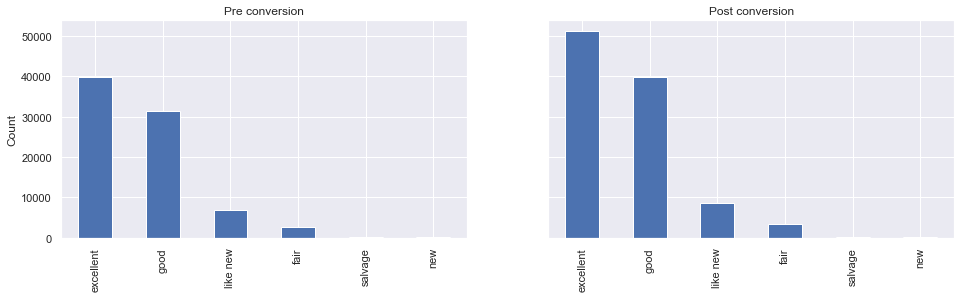

In [44]:
#peep to see result of substitution
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4),sharey=True)
datav2.condition.value_counts().sort_values(ascending=False).plot(kind='bar',ax=ax1)
data_copy.condition.value_counts().sort_values(ascending=False).plot(kind='bar',ax=ax2)
ax1.set_ylabel('Count')
ax1.set_title('Pre conversion')
ax2.set_title('Post conversion')

In [45]:
#normalize the cylinders value counts and save into a dataframe
cyl_prob = pd.DataFrame(list(data_copy.cylinders.value_counts(normalize=True).items()),columns = ['cylinders','prob'])
#substitute missing values in cylinder to random states based on their probabilities
data_copy.loc[data_copy.cylinders.isna(), 'cylinders'] = np.random.choice(cyl_prob.cylinders, 
                                                size=data_copy.cylinders.isna().sum(),
                                                replace=True, 
                                                p=cyl_prob.prob)

In [47]:
#normalize the title status value counts and save into a dataframe
ts_prob = pd.DataFrame(list(data_copy.title_status.value_counts(normalize=True).items()),columns = ['ts','prob'])
#substitute missing values in title_status to random states based on their probabilities
data_copy.loc[data_copy.title_status.isna(), 'title_status'] = np.random.choice(ts_prob.ts, 
                                                size=data_copy.title_status.isna().sum(),
                                                replace=True, 
                                                p=ts_prob.prob)

In [48]:
#normalize the drive value counts and save into a dataframe
dr_prob = pd.DataFrame(list(data_copy.drive.value_counts(normalize=True).items()),columns = ['drive','prob'])
#substitute missing values in title_status to random states based on their probabilities
data_copy.loc[data_copy.drive.isna(), 'drive'] = np.random.choice(dr_prob.drive, 
                                                size=data_copy.drive.isna().sum(),
                                                replace=True, 
                                                p=dr_prob.prob)

In [49]:
#normalize the type value counts and save into a dataframe
type_prob = pd.DataFrame(list(data_copy.type.value_counts(normalize=True).items()),columns = ['type','prob'])
#substitute missing values in title_status to random states based on their probabilities
data_copy.loc[data_copy.type.isna(), 'type'] = np.random.choice(type_prob.type, 
                                                size=data_copy.type.isna().sum(),
                                                replace=True, 
                                                p=type_prob.prob)

In [50]:
#normalize the color value counts and save into a dataframe
pc_prob = pd.DataFrame(list(data_copy.paint_color.value_counts(normalize=True).items()),columns = ['color','prob'])
#substitute missing values in title_status to random states based on their probabilities
data_copy.loc[data_copy.paint_color.isna(), 'paint_color'] = np.random.choice(pc_prob.color, 
                                                size=data_copy.paint_color.isna().sum(),
                                                replace=True, 
                                                p=pc_prob.prob)

In [51]:
data_copy.isna().sum()

region          0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
condition       0
cylinders       0
drive           0
type            0
paint_color     0
state           0
image_url       0
posting_date    0
postmd          0
Age             0
avg_mil         0
mil_rating      0
Made            0
dtype: int64

Group car type and colors into larger groups

In [52]:
# classify car type
def luxury(car):
  if car['type'] in ['sedan', 'convertible','coupe','hatchback','other']:
    cal='luxury_small'
  elif (car['type'] in ['SUV','wagon']):
    cal='luxury_large'
  elif (car['type'] in ['pickup','truck','offroad']):
    cal='non-luxury_small'
  elif (car['type'] in ['van','mini-van','bus']):
    cal='non-luxury_large'
  return cal 
data_copy['type_group'] = data_copy.apply(luxury, axis=1)
data_copy.head() 

region  price  year     manufacturer                    model    fuel  \
0  bakersfield  11975  2003  harley-davidson                 davidson     gas   
1  bakersfield  21950  2003        chevrolet           silverado 3500  diesel   
2  bakersfield  15590  2015             mini  hardtop 2 door cooper s   other   
3  bakersfield   3975  2006          pontiac                       g6     gas   
4  bakersfield   8000  1972        chevrolet                 chevelle     gas   

   odometer title_status transmission  condition  ... paint_color state  \
0  207000.0        clean    automatic  excellent  ...       black    ca   
1  202537.0        clean    automatic  excellent  ...        grey    ca   
2   60291.0        clean        other       good  ...         red    ca   
3  187000.0        clean    automatic  excellent  ...      silver    ca   
4   61000.0        clean    automatic       fair  ...       white    ca   

                                           image_url  \
0  https://images.craigslist.org/00F0F_eEBhgvA15M...   
1  https://images.craigslist.org/00m0m_9owDGrPLWK...   
2  https://images.craigslist.org/00f0f_dGlIKGTKrJ...   
3  https://images.craigslist.org/00V0V_5uw5gVZjSk...   
4  https://images.craigslist.org/00U0U_gvATaIvxTn...   

               posting_date  postmd Age       avg_mil     mil_rating  \
0  2021-05-04T12:26:43-0700  May-04  19  10894.736842  below average   
1  2021-05-04T12:04:51-0700  May-04  19  10659.842105  below average   
2  2021-05-04T11:41:15-0700  May-04   7   8613.000000  below average   
3  2021-05-04T11:35:04-0700  May-04  16  11687.500000  below average   
4  2021-05-04T11:30:14-0700  May-04  50   1220.000000  below average   

       Made        type_group  
0  American  non-luxury_small  
1  American  non-luxury_small  
2   English      luxury_small  
3  American      luxury_small  
4  American      luxury_large  

[5 rows x 23 columns]

In [53]:
# classify car color
def color(paint):
  if paint['paint_color'] in ['white','silver','yellow','orange','green','custom']:
    col='light color'
  elif (paint['paint_color'] in ['black','red','blue','purple','grey','brown']):
    col='dark color'
  return col 
data_copy['color_group'] = data_copy.apply(color, axis=1)
data_copy.head() 

region  price  year     manufacturer                    model    fuel  \
0  bakersfield  11975  2003  harley-davidson                 davidson     gas   
1  bakersfield  21950  2003        chevrolet           silverado 3500  diesel   
2  bakersfield  15590  2015             mini  hardtop 2 door cooper s   other   
3  bakersfield   3975  2006          pontiac                       g6     gas   
4  bakersfield   8000  1972        chevrolet                 chevelle     gas   

   odometer title_status transmission  condition  ... state  \
0  207000.0        clean    automatic  excellent  ...    ca   
1  202537.0        clean    automatic  excellent  ...    ca   
2   60291.0        clean        other       good  ...    ca   
3  187000.0        clean    automatic  excellent  ...    ca   
4   61000.0        clean    automatic       fair  ...    ca   

                                           image_url  \
0  https://images.craigslist.org/00F0F_eEBhgvA15M...   
1  https://images.craigslist.org/00m0m_9owDGrPLWK...   
2  https://images.craigslist.org/00f0f_dGlIKGTKrJ...   
3  https://images.craigslist.org/00V0V_5uw5gVZjSk...   
4  https://images.craigslist.org/00U0U_gvATaIvxTn...   

               posting_date  postmd Age       avg_mil     mil_rating  \
0  2021-05-04T12:26:43-0700  May-04  19  10894.736842  below average   
1  2021-05-04T12:04:51-0700  May-04  19  10659.842105  below average   
2  2021-05-04T11:41:15-0700  May-04   7   8613.000000  below average   
3  2021-05-04T11:35:04-0700  May-04  16  11687.500000  below average   
4  2021-05-04T11:30:14-0700  May-04  50   1220.000000  below average   

       Made        type_group  color_group  
0  American  non-luxury_small   dark color  
1  American  non-luxury_small   dark color  
2   English      luxury_small   dark color  
3  American      luxury_small  light color  
4  American      luxury_large  light color  

[5 rows x 24 columns]

In [54]:
#save data file and load
data_copy.to_csv('vehicles2_rec.csv',index=False)


### RECOMMENDATION SYSTEM

Now that the data has been cleaned, the recommender system can be engaged. This will be a **contenet-based recommender system**  where recommendations are based on the similarity of the vehicle features and not on explicit (user preference or profile) user metadata.

In [18]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
#import io
import matplotlib.pyplot as plt
%matplotlib inline

#reading the file
df = pd.read_csv('vehicles2_rec.csv')

In [125]:
# Function for recommending cars based on car manufacturer country. 
# It takes car manufacturer country, color group, type group  and price range as input.

def recommend(made,color_group,type_group,price_range):
    
    # Matching the type with the dataset and reset the index
    data = df.loc[(df['color_group']==color_group) 
                  & (df['type_group']==type_group) & ((df['price']>=price_range[0]) & (df['price']<=price_range[1]))]  
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['Made'])
    
    #Converting the car manufacturer country into vectors and used unigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['Made'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_manufacturer
    idx = indices[made]
# Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))
# Sort the cars
    sig = sorted(sig, reverse=True)
# Scores of the 6 most similar cars 
    sig = sig[0:6]
# car indicies
    movie_indices = [i[0] for i in sig]
   
    # Top 6 car recommendations
    rec = data[['price','Made','manufacturer', 'model','type','year','Age','condition','fuel','title_status'
                ,'transmission','paint_color','mil_rating','state']].iloc[movie_indices]
    return rec
    
    # if the image urls were still in place, 
    # the images of the recommended cars would have been printed with this
    
   # for i in rec['image_url']:
        #response = requests.get(i,stream=True)
       # img = Image.open(io.BytesIO(response.content))
        #plt.figure()
        #print(plt.imshow(img))
   

Let's recommend cars that are similar to **_"American"_**, has a **_"light color"_** theme, is a **_"small luxury"_** car and within the price range of **_5000 USD - 10000 USD_.**

In [128]:
recommend("American","light color","luxury_small",(5000,10000))

price      Made   manufacturer           model       type  year  Age  \
2299   9499  American      chevrolet  malibu limited      sedan  2016    6   
2298   7500    German  mercedes-benz       benz s500      sedan  2006   16   
2297   6000  Japanese         nissan    altima 2.5 s      sedan  2008   14   
2296   7900  Japanese         nissan            350z      coupe  2006   16   
2295   7988  Japanese         toyota           yaris      other  2009   13   
2294   6500  Japanese          honda           civic  hatchback  2000   22   

      condition    fuel title_status transmission paint_color     mil_rating  \
2299  excellent     gas        clean    automatic      silver  above average   
2298  excellent     gas        clean    automatic      silver  below average   
2297  excellent     gas        clean    automatic       white  below average   
2296  excellent     gas        clean    automatic      orange  below average   
2295       good     gas        clean    automatic      custom  below average   
2294       good  diesel        clean    automatic      silver  below average   

     state  
2299    fl  
2298    fl  
2297    fl  
2296    fl  
2295    fl  
2294    fl

### DATA MODELING (PRICE PREDICTION)

In [35]:
import pandas as pd
import numpy as np
df = pd.read_csv('vehicles2_rec.csv')
df.drop(['image_url','posting_date','mil_rating','Made','type_group'
         ,'color_group','postmd','avg_mil','region'],axis=1,inplace=True)

Let's see the distribution of the numerical data.

It seems there is no clear relationship visible among the price and the other numerical variables.

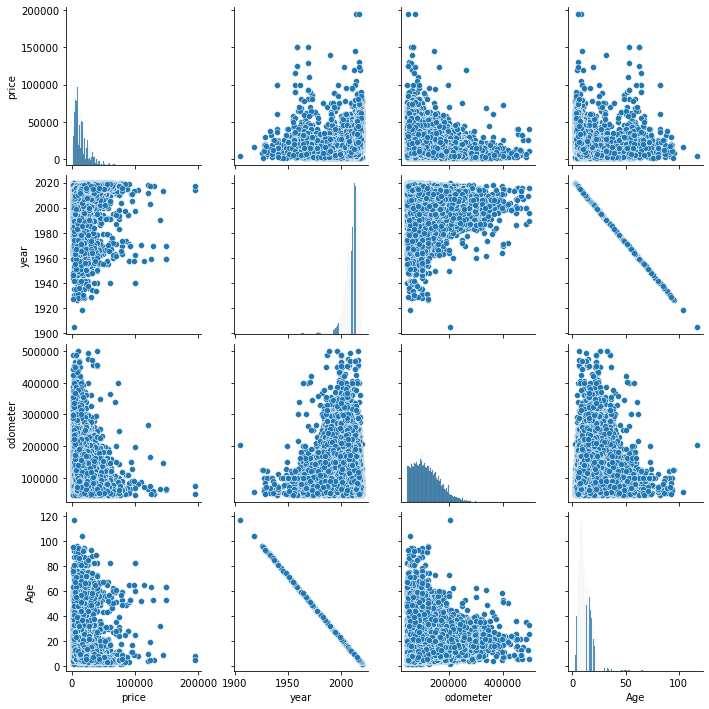

In [83]:
import seaborn as sns
sns.pairplot(df)

In [36]:
df.cylinders.value_counts()

6 cylinders     38327
4 cylinders     34478
8 cylinders     29067
5 cylinders       927
10 cylinders      516
other             352
3 cylinders       134
12 cylinders       37
Name: cylinders, dtype: int64

In [37]:
import seaborn as sns
df.cylinders.replace("other",np.nan,inplace=True)
df.cylinders.value_counts()

6 cylinders     38327
4 cylinders     34478
8 cylinders     29067
5 cylinders       927
10 cylinders      516
3 cylinders       134
12 cylinders       37
Name: cylinders, dtype: int64

In [38]:
#normalize the cylinders value counts and save into a dataframe
cyl_prob = pd.DataFrame(list(df.cylinders.value_counts(normalize=True).items()),columns = ['cylinders','prob'])
#substitute missing values in cylinder to random states based on their probabilities
df.loc[df.cylinders.isna(), 'cylinders'] = np.random.choice(cyl_prob.cylinders, 
                                                size=df.cylinders.isna().sum(),
                                                replace=True, 
                                                p=cyl_prob.prob)

In [39]:
df.cylinders.value_counts()

6 cylinders     38472
4 cylinders     34599
8 cylinders     29149
5 cylinders       929
10 cylinders      516
3 cylinders       136
12 cylinders       37
Name: cylinders, dtype: int64

In [40]:
#since cylinder has the word 'cylinder' after the number, we remove it and make it numerical
df['cylinders']=df['cylinders'].apply(lambda x:x.split(' ')[0])
df['cylinders']=df['cylinders'].astype('int')
df['cylinders'].dtype

dtype('int32')

C:\Users\olisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='odometer'>

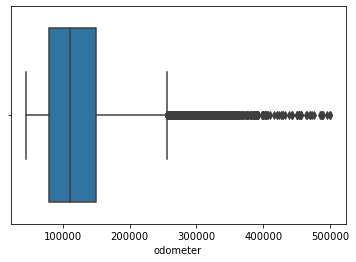

In [41]:
cols=['odometer','cylinders']
sns.boxplot(df[cols[0]])

C:\Users\olisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cylinders'>

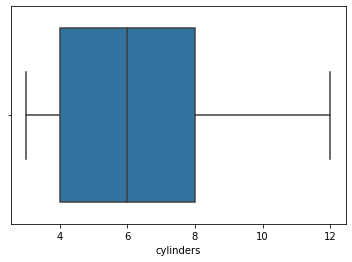

In [42]:
sns.boxplot(df[cols[1]])

odometer
--------------------------------------------------
Percentiles: 25th=79393.000, 75th=150000.000, IQR=70607.000
Lower: -26517.5  Upper: 255910.5
Identified outliers: 1652
Non-outlier observations: 102186


<AxesSubplot:>

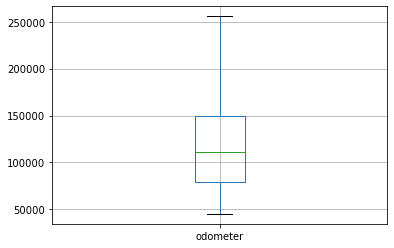

In [43]:
#further remove outliers in odometer for model purposes
def find_outliers_limit(df,col):
    print(col)
    print('-'*50)
    #removing outliers
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Lower:',lower,' Upper:',upper)
    return lower,upper
def remove_outlier(df,col,upper,lower):
    # identify outliers
    outliers = [x for x in df[col] if x > upper or x < lower]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in df[col] if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    final= np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return final
outlier_cols=['odometer']
for col in outlier_cols:
    lower,upper=find_outliers_limit(df,col)
    df[col]=remove_outlier(df,col,upper,lower)
    
plt.figure(figsize=(6,4))
df[outlier_cols].boxplot()

##### Handling categorical columns
We convert categorical columns to numerical values using scikit learn OrdinalEncoder

In [109]:
# Loading Libraries
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from prettytable import PrettyTable

Prepare data for model processing by handling categorical features
##### Preparing categorical features for correlation matrix

In [350]:
#select numerical and categorical data
num_df=df.select_dtypes(include=np.number)
cat_df=df.select_dtypes(include=object)
#assign encoder
encoding=OrdinalEncoder()
#place categorical columns to list and encode
cat_cols=cat_df.columns.tolist()
encoding.fit(cat_df[cat_cols])
#transform categorical encoding and place in dataframe
cat_oe=encoding.transform(cat_df[cat_cols])
cat_oe=pd.DataFrame(cat_oe,columns=cat_cols)
cat_df.reset_index(inplace=True,drop=True)

cat_oe.head()

num_df.reset_index(inplace=True,drop=True)

cat_oe.reset_index(inplace=True,drop=True)

final_all_df=pd.concat([num_df,cat_oe],axis=1)

<AxesSubplot:>

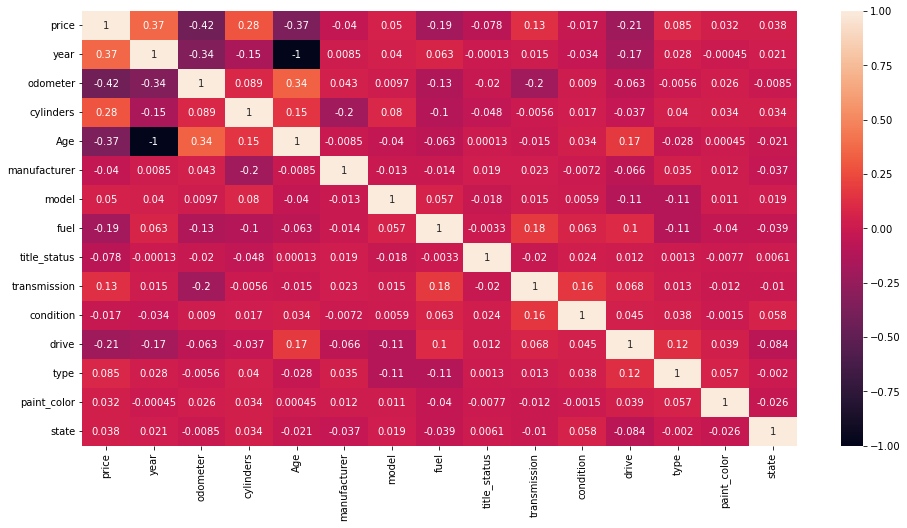

In [354]:
#plot the correlation matrix
plt.figure(figsize=(16,8))
sns.heatmap(data=final_all_df.corr(),annot=True)

There are only a few categories having a medium level correlation with price, namely: **year, odometer, cylinders and age** (similar to year). Transforming the price lead to a slight increase in the correlation of some of those categories. As such, the log transformation of price will be used to tain the model.

In [69]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'fuel', 'odometer',
       'title_status', 'transmission', 'condition', 'cylinders', 'drive',
       'type', 'paint_color', 'state', 'Age'],
      dtype='object')

In [566]:
data_reg = df.loc[:, ['price', 'year', 'Age', 'odometer','cylinders','manufacturer', 'model', 'fuel', 
                      'title_status', 'transmission', 'condition',  'drive',
                      'type', 'paint_color', 'state']]
label_reg = data_reg
data_reg_original = data_reg
data_reg.head()

price  year  Age  odometer  cylinders     manufacturer  \
0  11975  2003   19  207000.0          8  harley-davidson   
1  21950  2003   19  202537.0          8        chevrolet   
2  15590  2015    7   60291.0          4             mini   
3   3975  2006   16  187000.0          4          pontiac   
4   8000  1972   50   61000.0          8        chevrolet   

                     model    fuel title_status transmission  condition drive  \
0                 davidson     gas        clean    automatic  excellent   rwd   
1           silverado 3500  diesel        clean    automatic  excellent   4wd   
2  hardtop 2 door cooper s   other        clean        other       good   4wd   
3                       g6     gas        clean    automatic  excellent   fwd   
4                 chevelle     gas        clean    automatic       fair   rwd   

        type paint_color state  
0     pickup       black    ca  
1      truck        grey    ca  
2  hatchback         red    ca  
3      sedan      silver    ca  
4        SUV       white    ca

##### Label Encoding
We will be using LabelEncoder to convert categorical values to assign numerical values or the model

In [567]:
label_reg = data_reg

le_manufacturer = LabelEncoder()
le_model = LabelEncoder()
le_fuel = LabelEncoder()
le_title_status = LabelEncoder()
le_transmission = LabelEncoder()
le_condition = LabelEncoder()
le_drive = LabelEncoder()
le_type = LabelEncoder()
le_color = LabelEncoder()
le_state = LabelEncoder()

label_reg["type"] = le_type.fit_transform(label_reg['type'])
label_reg["manufacturer"] = le_manufacturer.fit_transform(label_reg['manufacturer'])
label_reg['paint_color'] = le_color.fit_transform(label_reg['paint_color'])
label_reg['drive'] = le_drive.fit_transform(label_reg['drive'])
label_reg["fuel"] = le_fuel.fit_transform(label_reg['fuel'])
label_reg["title_status"] = le_title_status.fit_transform(label_reg['title_status'])
label_reg['transmission'] = le_transmission.fit_transform(label_reg['transmission'])
label_reg['condition'] = le_condition.fit_transform(label_reg['condition'])
label_reg['state'] = le_state.fit_transform(label_reg['state'])
label_reg['model'] = le_model.fit_transform(label_reg['model'])

label_reg.head()

price  year  Age  odometer  cylinders  manufacturer  model  fuel  \
0  11975  2003   19  207000.0          8            14   3316     2   
1  21950  2003   19  202537.0          8             6   8732     0   
2  15590  2015    7   60291.0          4            27   5715     4   
3   3975  2006   16  187000.0          4            30   5387     2   
4   8000  1972   50   61000.0          8             6   2552     2   

   title_status  transmission  condition  drive  type  paint_color  state  
0             0             0          0      2     8            0      0  
1             0             0          0      0    10            5      0  
2             0             2          2      0     4            8      0  
3             0             0          0      1     9            9      0  
4             0             0          1      2     0           10      0

To build the prediction model, split the data into train and test data in an 80-20 split.

In [568]:
X_regla = label_reg.drop('price', axis = 1)
y_regla = label_reg['price']

X_train, X_test, y_train, y_test = train_test_split(X_regla, y_regla, test_size = 0.2, random_state = 25)

#scaler=StandardScaler()
#X_train_scaled=scaler.fit_transform(X_train)
#X_test_scaled=scaler.transform(X_test)

We build three machine learning models and evaluate their performance to pick the best performing model for our price prediction.
 - Linear Regression model
 - XGBoost Regressor model
 - Random Forest Regressor model

In [569]:
# Model Building
def train_ml_model(x,y,model_type):
    if model_type=='lr':
        model=LinearRegression()
    elif model_type=='xgb':
        model=XGBRegressor()
    elif model_type=='rf':
        model=RandomForestRegressor()
    model.fit(x,y)
    
    return model

model_lr=train_ml_model(X_train,y_train,'lr')

model_xgb=train_ml_model(X_train,y_train,'xgb')

model_rf=train_ml_model(X_train,y_train,'rf')

In [413]:
#evaluate models
def model_evaluate(model,x,y):
    predictions=model.predict(x)
   # predictions=np.exp(predictions)
    mse=mean_squared_error(y,predictions)
    mae=mean_absolute_error(y,predictions)
    mape=mean_absolute_percentage_error(y,predictions)
    #msle=mean_squared_log_error(y,predictions)
    
    mse=round(mse,2)
    mae=round(mae,2)
    mape=round(mape,2)
    #msle=round(msle,2)
    
    return [mse,mae,mape]

summary=PrettyTable(['Model','MSE','MAE','MAPE'])
summary.add_row(['LR']+model_evaluate(model_lr,X_test,y_test))
summary.add_row(['XGB']+model_evaluate(model_xgb,X_test,y_test))
summary.add_row(['RF']+model_evaluate(model_rf,X_test,y_test))

print(summary)

+-------+-------------+---------+------+
| Model |     MSE     |   MAE   | MAPE |
+-------+-------------+---------+------+
|   LR  | 76013186.78 |  6180.1 | 0.67 |
|  XGB  |  17980394.9 | 2605.11 | 0.27 |
|   RF  | 16900348.63 | 2202.82 | 0.25 |
+-------+-------------+---------+------+


Above is the summary of the evaluation metrics used to evaluate the performance of the machine learing models. The parameters include mean square error (MSE), mean absolute error (MAE), and mean absolute percentage error (MAPE). The lower these evaluation metrics are, the better the model.

The most performing machine learning model appears to be the **Random Forest Regressor** model which has the lowest evaluation parameters 

In [573]:
rf = X_train.join(y_train)
price_pred_df=rf.join(pd.Series(model_rf.predict(X_train), name='price_pred'))
price_pred_df.to_csv('vehicles_price_pred.csv')


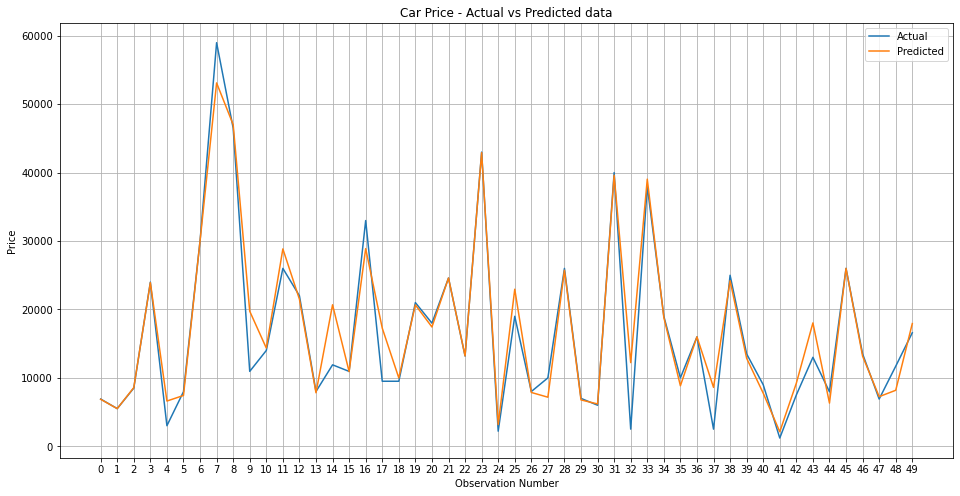

In [414]:
#plot the actual vs the predicted price
y_pred=(model_rf.predict(X_test))

number_of_observations=50

x_ax = range(len(y_test[:number_of_observations]))

plt.figure(figsize=(16,8))
plt.plot(x_ax, y_test[:number_of_observations], label="Actual")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")
plt.title("Car Price - Actual vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()


Save model

In [267]:
import pickle
rf_uc_model = 'rf_uc_model.sav'
pickle.dump(model_rf,open(rf_uc_model, 'wb'))

How users can make predictions using a defined function called **predict**:

In [535]:
def predict(year,age,odom,cylin,manuf,model,fueltyp,title,transm,cond,drivetype,type,color,state):
    pred = (year,age,odom,cylin,manuf,model,fueltyp,title,transm,cond,drivetype,type,color,state)
    x = np.array([pred])
    #convert input using LabelEncoder
    le_reg = [np.nan,np.nan,np.nan,np.nan,le_manufacturer, le_model,le_fuel,le_title_status,le_transmission,
                  le_condition,le_drive,le_type,le_color,le_state]
    
    for i in range(4,14):
        x[:,i] = le_reg[i].transform(x[:,i])
        x
       
    loaded_model = pickle.load(open(rf_uc_model,'rb'))
    price_est = loaded_model.predict(x)
    return "Price Estimate =  $" + str(price_est)

In [559]:
#Or predictions can be done manually 
#format - (year,age,odom,cylin,manuf,model,fueltyp,title,transm,cond,drivetype,type,color,state)
predict(2013,8,100000.0,4,'nissan','maxima','gas','clean','automatic'
                 ,'good','rwd','sedan','blue','ca')

'Price Estimate =  $[10262.04]'

In [560]:
#make prediction
#pred_format = (year,age,odom,cylin,manuf,model,fueltyp,title,transm,cond,drivetype,type,color,state)

pred = (2020,8,100000.0,4,'nissan','maxima','gas','clean','automatic'
                 ,'good','rwd','sedan','blue','ca') # user input
#system converts input to array
x=np.array([pred])
x

array([['2020', '8', '100000.0', '4', 'nissan', 'maxima', 'gas', 'clean',
        'automatic', 'good', 'rwd', 'sedan', 'blue', 'ca']], dtype='<U32')

In [561]:
#input array converted using LabelEncoder
x[:, 4] = le_manufacturer.transform(x[:,4])
x[:, 5] = le_model.transform(x[:,5])
x[:, 6] = le_fuel.transform(x[:,6])
x[:, 7] = le_title_status.transform(x[:,7])
x[:, 8] = le_transmission.transform(x[:,8])
x[:, 9] = le_condition.transform(x[:,9])
x[:, 10] = le_drive.transform(x[:,10])
x[:, 11] = le_type.transform(x[:,11])
x[:, 12] = le_color.transform(x[:,12])
x[:, 13] = le_state.transform(x[:,13])

x = x.astype(float)
#x = pd.to_numeric(x)
x

array([[2.020e+03, 8.000e+00, 1.000e+05, 4.000e+00, 2.900e+01, 6.551e+03,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 9.000e+00,
        1.000e+00, 0.000e+00]])

In [562]:
#transformed input is fed into the model
price_pred = model_rf.predict(x)
print("Price Estimate = " + "$"+str(price_pred))

Price Estimate = $[14367.13]


**Apparently, there is a slight disparity between using the defined predict function and the manual method. It seems there is a slight process edit in the defined process. Still, they output similar price estimations.**

In [427]:
#load model for use using
loaded_model = pickle.load(open(rf_uc_model,'rb'))
result=loaded_model.score(X_test,y_test)
print(result)

0.8778520915830679


The loaded model has an estimate of the accuracy of **87.79%** on unseen data.

This seems to be a good model to use to predict used car prices.

##### Try another of the same model but with fewer categories

Using only a few of the categories as test to compare the accurracies: **odometer, cylinders, manufacturer, type, fuel, drive, paint_color**

In [429]:
data_reg2 = df.loc[:, ['price', 'year', 'odometer','cylinders','manufacturer','type', 
                      'fuel','drive','paint_color']]
label_reg2 = data_reg2
data_reg2_original = data_reg2
data_reg2.head()

price  year  odometer  cylinders     manufacturer       type    fuel drive  \
0  11975  2003  207000.0          8  harley-davidson     pickup     gas   rwd   
1  21950  2003  202537.0          8        chevrolet      truck  diesel   4wd   
2  15590  2015   60291.0          4             mini  hatchback   other   4wd   
3   3975  2006  187000.0          4          pontiac      sedan     gas   fwd   
4   8000  1972   61000.0          8        chevrolet        SUV     gas   rwd   

  paint_color  
0       black  
1        grey  
2         red  
3      silver  
4       white

##### Label Encoding
We will be using LabelEncoder to convert categorical values to assign numerical values or the model

In [430]:
label_reg2 = data_reg2

le_manufacturer = LabelEncoder()
le_type = LabelEncoder()
le_fuel = LabelEncoder()
le_drive = LabelEncoder()
le_colors = LabelEncoder()

label_reg2["manufacturer"] = le_manufacturer.fit_transform(label_reg2['manufacturer'])
label_reg2["type"] = le_type.fit_transform(label_reg2['type'])
label_reg2["fuel"] = le_fuel.fit_transform(label_reg2['fuel'])
label_reg2['drive'] = le_drive.fit_transform(label_reg2['drive'])
label_reg2['paint_color'] = le_color.fit_transform(label_reg2['paint_color'])



label_reg2.head()

price  year  odometer  cylinders  manufacturer  type  fuel  drive  \
0  11975  2003  207000.0          8            14     8     2      2   
1  21950  2003  202537.0          8             6    10     0      0   
2  15590  2015   60291.0          4            27     4     4      0   
3   3975  2006  187000.0          4            30     9     2      1   
4   8000  1972   61000.0          8             6     0     2      2   

   paint_color  
0            0  
1            5  
2            8  
3            9  
4           10

To build the prediction model, split the data into train and test data in an 80-20 split.

In [431]:
X_regla2 = label_reg2.drop('price', axis = 1)
y_regla2 = label_reg2['price']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_regla2, y_regla2, test_size = 0.2, random_state = 25)

#scaler=StandardScaler()
#X_train_scaled=scaler.fit_transform(X_train)
#X_test_scaled=scaler.transform(X_test)

We build three machine learning models and evaluate their performance to pick the best performing model for our price prediction.
 - Linear Regression model
 - XGBoost Regressor model
 - Random Forest Regressor model

In [432]:
# Model Building
def train_ml_model2(x,y,model_type):
    if model_type=='lr':
        model=LinearRegression()
    elif model_type=='xgb':
        model=XGBRegressor()
    elif model_type=='rf':
        model=RandomForestRegressor()
    model.fit(x,y)
    
    return model

model_lr=train_ml_model2(X_train2,y_train2,'lr')

model_xgb=train_ml_model2(X_train2,y_train2,'xgb')

model_rf=train_ml_model2(X_train2,y_train2,'rf')

In [433]:
#evaluate models
def model_evaluate2(model,x,y):
    predictions=model.predict(x)
   # predictions=np.exp(predictions)
    mse=mean_squared_error(y,predictions)
    mae=mean_absolute_error(y,predictions)
    mape=mean_absolute_percentage_error(y,predictions)
    #msle=mean_squared_log_error(y,predictions)
    
    mse=round(mse,2)
    mae=round(mae,2)
    mape=round(mape,2)
    #msle=round(msle,2)
    
    return [mse,mae,mape]

summary=PrettyTable(['Model','MSE','MAE','MAPE'])
summary.add_row(['LR']+model_evaluate(model_lr,X_test2,y_test2))
summary.add_row(['XGB']+model_evaluate(model_xgb,X_test2,y_test2))
summary.add_row(['RF']+model_evaluate(model_rf,X_test2,y_test2))

print(summary)

+-------+-------------+---------+------+
| Model |     MSE     |   MAE   | MAPE |
+-------+-------------+---------+------+
|   LR  | 78077332.69 | 6321.43 | 0.69 |
|  XGB  | 24366775.73 | 3184.92 | 0.33 |
|   RF  | 20564867.24 | 2495.66 | 0.28 |
+-------+-------------+---------+------+


Above is the summary of the evaluation metrics used to evaluate the performance of the machine learing models. The parameters include mean square error (MSE), mean absolute error (MAE), and mean absolute percentage error (MAPE). The lower these evaluation metrics are, the better the model.

The most performing machine learning model appears to be the **Random Forest Regressor** model which has the lowest evaluation parameters 

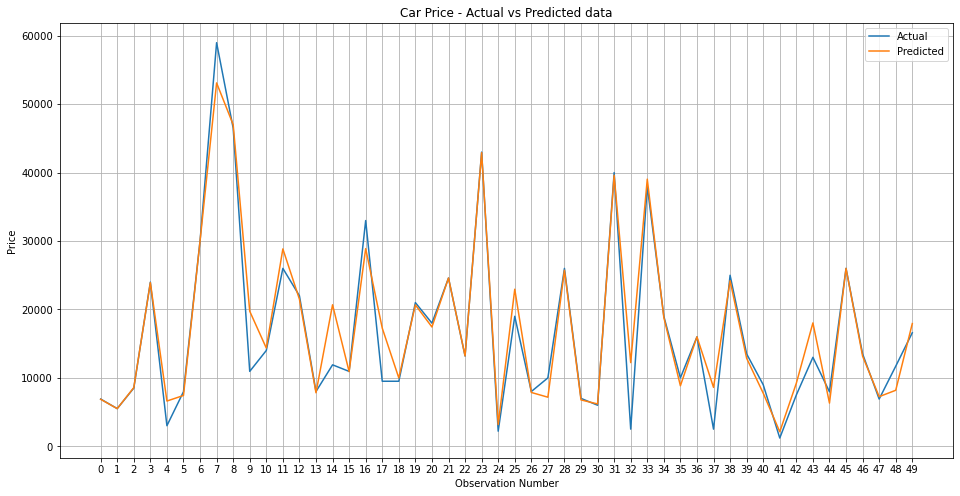

In [434]:
#plot the actual vs the predicted price
y_pred2=(model_rf.predict(X_test2))

number_of_observations=50

x_ax = range(len(y_test2[:number_of_observations]))

plt.figure(figsize=(16,8))
plt.plot(x_ax, y_test[:number_of_observations], label="Actual")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")
plt.title("Car Price - Actual vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()


Save model

In [439]:
import pickle
rf_uc_model2 = 'rf_uc_model2.sav'
pickle.dump(model_rf,open(rf_uc_model2, 'wb'))

How users can make predictions:

In [435]:
#make prediction
#pred_format = (year,age,odom,cylin,manuf,model,fueltyp,title,transm,cond,drivetype,type,color,state)

pred2 = (2013,59613.0,4,'tesla','sedan','electric','rwd','blue') # user input
#system converts input to array
x2=np.array([pred2])
x2

array([['2013', '59613.0', '4', 'tesla', 'sedan', 'electric', 'rwd',
        'blue']], dtype='<U32')

In [436]:
#input array converted using LabelEncoder
x2[:,3] = le_manufacturer.transform(x2[:,3])
x2[:,4] = le_type.transform(x2[:,4])
x2[:,5] = le_fuel.transform(x2[:,5])
x2[:,6] = le_drive.transform(x2[:,6])
x2[:,7] = le_color.transform(x2[:,7])

#x2 = x2.astype(float)
#x = pd.to_numeric(x)
x2

array([['2013', '59613.0', '4', '36', '9', '1', '2', '1']], dtype='<U32')

In [437]:
#transformed input is fed into the model
price_pred2 = model_rf.predict(x2)
print("Price Estimate = " + "$"+str(price_pred2))

Price Estimate = $[29990.]


In [440]:
#load model for use using
loaded_model2 = pickle.load(open(rf_uc_model2,'rb'))
result2=loaded_model2.score(X_test2,y_test2)
print(result2)

0.8507767073389598


This second model records an accuracy of **85.07%**. Slightly lower than the previous.

### INSIGHTS

 - Most of the used car listings were found in most of the top 10 most populated states in the US
 - **Ford, Chevrolet, and Toyota** were the most popular car manufacturers. This is because majority of the listed cars were either sedans, SUVs, trucks or pickups which these manufacturers are known for producing.
 - These top 3 car manufacturers had an **average price of ~16k USD**, ~1k USD  higher than the total average price of all cars listed in the top 12 states with more than 5000 car listings.*
 - On average, **pickups and trucks go for ~23k USD, almost 2x that of SUVs and sedans**.*
 - Since there seems to be a huge market for used luxury cars (sedans and SUVs) the **recommendation engine should focus more on these types of cars**.
 - California has the most car listings with an average price of ~15k USD which is ~1.5x less than that of Washington state with ~4x less number of car listings.*
 - **Gas fuel engines** is the most occuring type of fuel in all cars except for pickups and trucks which show a considerable split between gas and diesel engine vehicles
 - The **majority of the cars have below average miles driven per year**. This suggests the cars have not been overworked and can be resolved for good value especially when most of then are either in excellent or good condition.
 - The average price of cars seems relatively higher for newer cars than older cars, but this is affected by other factors such as vintage cars and level of luxury attributed to the model*
 - **White and black colored cars** are the two most popular car colors also having the two highest **average prices, ~17.6k USD and ~16.6k USD respectively**. Ford and Cehvrolet car manufacturers are prevalent in this department.*

**Insight generated in conjunction with Tableau*

### CONCLUSION
A recommender system and a price prediction model for the used car dataset was successfully created for this project after extensive data cleaning and preprocessing. 

The recommender system is able to print out the **6 most similar cars** to what the user sets as a guiding parameter much like a search engine filter.

The price prediction model was achieved through **Random Forest Regressor machine learning model** and saved for use to predict used car prices after specifying the relevant parameters. Two models were built with similar levels of accuracy. The one with the higher accuracy (**rc_uc_model, acc = 87.79%**) will be used for price predictions.

### CHALLENGES AND RECOMMENDATIONS

#### CHALLENGES
##### Dealing with missing data
 - To have a better cleaned data, some of the missing values can be figured out with the other information available. For example, for missing car types, this can be inferred from the manufacturer and model columns. Some manufacturers have a common type of car they produce (ford produces mostly pickups and trucks), and the models can comstimes infer what type of car it is. So, more coding would be needed to ascertain what type of car an entry is if that information was missing.
 - The missing manufacturers can also be infered from the model. Although this dataset had some models that were questionable, most of them can be used to get the manufacturer with an extensive code script.
 - Using a random choice method to assign items to missing cells doesn't take into account the other data in that row but helps to rationalize what it could have been based on the available item probabilities of occuring.

##### Recommendation system
 - The recommendation system seems to be returning cars from the same state. Further work would have to modify the code to take other cars in neighboring states into consideration

##### Price prediction model
 - The price prediction model is limited to the range of car specifications identified in the dataset. Any other specification not included in the dataset will run into an error
 - A cleaner way to prepare the data to build the maching learning model will need to be implemented to reduce the run time of the model

#### RECOMMENDATIONS
##### Price prediction model
 - Use advanced price prediction techniques and develope an interactive user interface where users can estimate the price of a car based on various features
 - segregate the price prediction models for different regions - East and West coast
 
##### Recommender system
 - Use a dataset where the images of the listed cars are still accessible. That would make the recommendation system interesting by adding a visual level to it
 - Explore other methods of building a content based recommender system to incorporate location, seasonal weather condition, vehicle main use case
 - implement an input function where users input their choices to recommendation specification prompts